In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv.xls')

#### 4. Tasks & Procedure

#### Part 1: Data Exploration and Preprocessing

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
import matplotlib.pyplot as plt

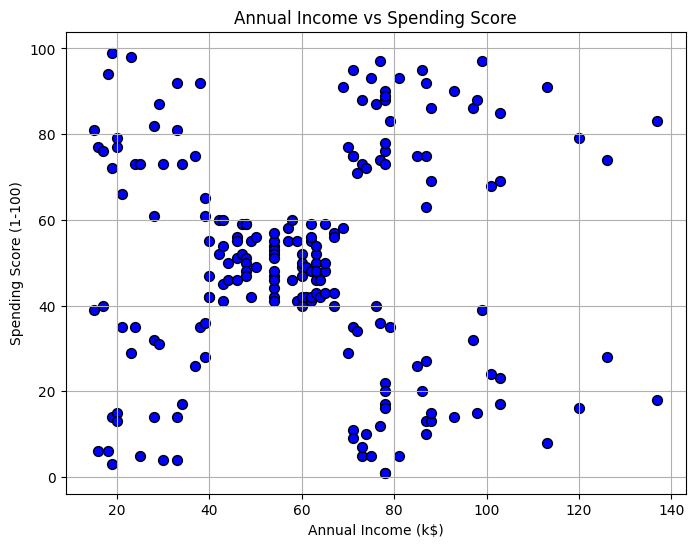

In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c='blue', edgecolor='k', s=50)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

#### Part 2: K-Means Clustering


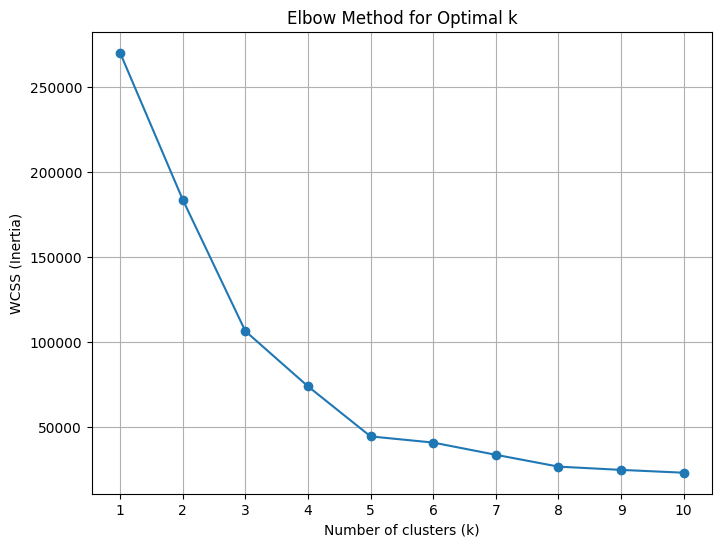

In [10]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

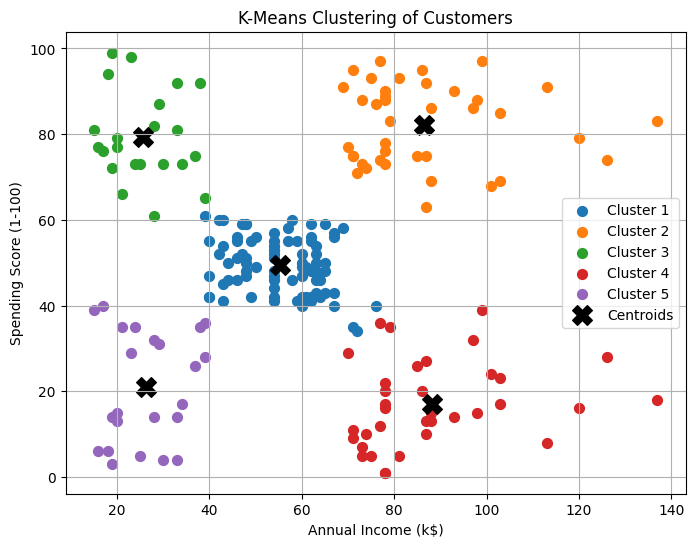

In [11]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))

for i in range(optimal_k):
    plt.scatter(
        X[cluster_labels == i, 0], 
        X[cluster_labels == i, 1], 
        s=50, 
        label=f'Cluster {i+1}'
    )

plt.scatter(
    kmeans.cluster_centers_[:,0], 
    kmeans.cluster_centers_[:,1], 
    s=200, 
    c='black', 
    marker='X', 
    label='Centroids'
)

plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#### Part 3: Agglomerative Hierarchical Clustering

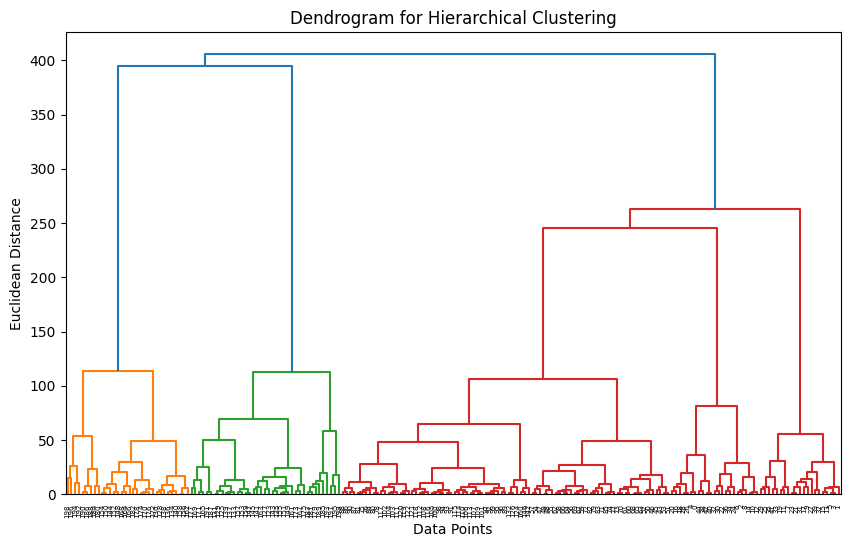

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

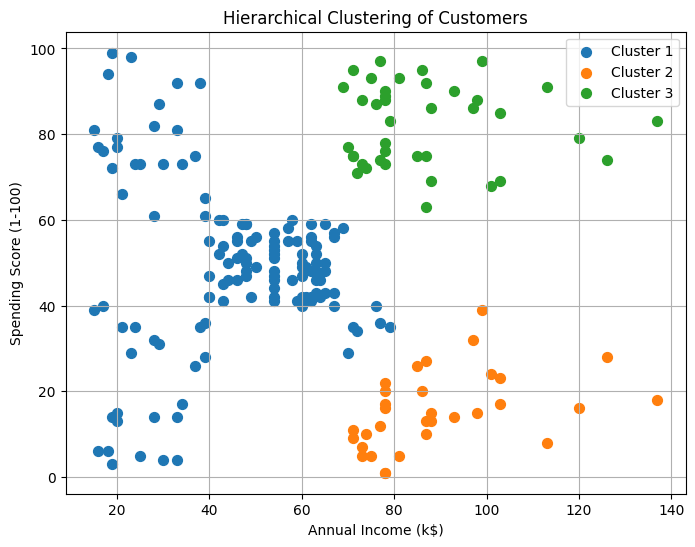

In [13]:
optimal_clusters = 3
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
hc_labels = hc.fit_predict(X)

plt.figure(figsize=(8,6))

for i in range(optimal_clusters):
    plt.scatter(X[hc_labels == i, 0], X[hc_labels == i, 1],
                s=50, label=f'Cluster {i+1}')

plt.title('Hierarchical Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#### Part 4: DBSCAN Clustering

/var/folders/wy/pyd6gfbj0rn5k7yr6hcsygdw0000gn/T/ipykernel_80491/2824878636.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


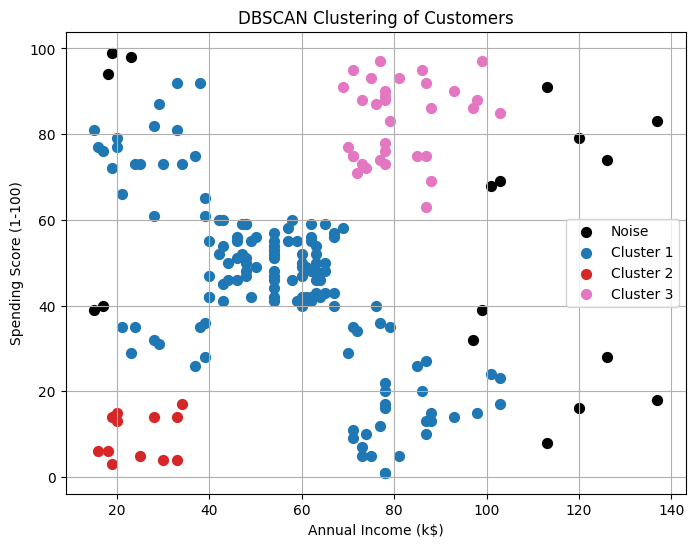

Noise points: 17
Cluster 1 points: 138
Cluster 2 points: 12
Cluster 3 points: 33


In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=9)  
db_labels = dbscan.fit_predict(X_scaled)

unique_labels = np.unique(db_labels)

plt.figure(figsize=(8,6))
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    if label == -1:
        plt.scatter(X[db_labels == label, 0], X[db_labels == label, 1],
                    s=50, c='black', label='Noise')
    else:          
        plt.scatter(X[db_labels == label, 0], X[db_labels == label, 1],
                    s=50, color=colors(label), label=f'Cluster {label+1}')

plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

unique_labels, counts = np.unique(db_labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"Noise points: {count}")
    else:
        print(f"Cluster {label+1} points: {count}")


In [39]:
from sklearn.metrics import silhouette_score

results = {}

results['KMeans Silhouette'] = silhouette_score(X, cluster_labels)

results['Hierarchical Silhouette'] = silhouette_score(X, hc_labels)

if len(set(db_labels)) > 1:
    mask = db_labels != -1
    if len(set(db_labels[mask])) > 1:
        results['DBSCAN Silhouette'] = silhouette_score(X_scaled[mask], db_labels[mask])
    else:
        results['DBSCAN Silhouette'] = "Not defined (single cluster)"
else:
    results['DBSCAN Silhouette'] = "Not defined (all noise)"

for key, value in results.items():
    print(f"{key}: {value}")

KMeans Silhouette: 0.553931997444648
Hierarchical Silhouette: 0.4618340266628975
DBSCAN Silhouette: 0.3747117046515576


Although DBSCAN has a slightly higher silhouette score, K-Means is more suitable for this dataset because it produces a fixed number of clusters (k = 5) and assigns every customer to a group, making it actionable for marketing purposes. Its clusters are balanced, roughly spherical, and easy to interpret, aligning well with the distribution of Annual Income and Spending Score. The slightly lower silhouette score is outweighed by K-Means’ practicality, interpretability, and suitability for real-world customer segmentation.